# Edge detection on 2-D images: Compare different approaches
* Name: Pranjal Baranwal
* Roll No.: 200101083

## Outline 
* Introduction
* Techniques Used
  * Roberts
  * Prewitt
  * Sobel
  * Canny
  * Deep learning based

* Current Research
  * Models
  * Datasets

* Use Cases
  * Research Based
  * A funny Story

## Introduction
Before we dive in throught the concepts, firstly let me show you a picture.
> You might have seen this image when scrolling through instagram describing if you view this and that in this image you are more creative/left brained and bla bla.

![original image](https://i.pinimg.com/564x/94/27/d5/9427d55e069908bbcf749f5791c01a58.jpg)

Now without any context let's see what edge detection algorithms tell us about this image

![edge_teaser](edge_teaser.png).

It seems that the second edge detection is more accurate since it shows more white areas meaning more edges. But the first one is actually better. To appreciate that, try finding the horse in the second one. You will see that it doesn't contain sharp edges to do so. Now you will appreciate that the first one is "humanly" more accurate and probably the artist who created this might have used the outline sketch same as the first one to create this image.

### What is Edge Detection?

Edge detection is an important technique in computer vision that helps in identifying the boundaries of objects within images. It works by detecting discontinuities in brightness. These discontinuities are called edges. Edges are the points in an image where the brightness of the image changes sharply.

The edge detection task is highly challenging mostly due to presence of inherent noise in the image. We want the edge detection algorithm to be robust to noise and be able to detect edges accurately. 

## Techniques Used

Before we go through the techniques, let's first see the earliest foundations of edge detection algorithms.
1. From the definition we saw above, the edges are the points where the brightness changes very rapidly. So, we want to maximize the gradient(slope?) of the brightness function. 
2. This leads us to the simplest edge detection algorithm using the derivative of the image. Mathematically,

$$ \nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} $$

3. The f vector above highlights the path of steepest accent in the image. The magnitude is the rate of change of brightness.

4. This basic technique has a lot of limitations:
  * It is very sensitive to noise.
  * Taking image derivatives accenuates the higher frequencies thus amplifying the noise.
  * We would like the edge detection algorithm to be independent of orientation. This is not the case with the above algorithm. 
  * Calculating the derivative is computationally expensive.


5. So starting with this approach was admissible but still it has limitations. So, we take a new technique of averaging the pixels in a region using a mask. This techniques is called convolution.

![convolution](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/70_blog_image_3.png)

In the above we take a submatrix of the image conformable with the mask and multiply the elements of the mask with the corresponding elements of the submatrix and sum them up. This gives us the new pixel value.


There are many techniques used for edge detection. Some of them are conventional requiring a convolutional operation on the image itself while some of them are deep learning based. Here we will discuss some of the conventional techniques.

> Since this tutorial is only for learning purpose, we will be using the OpenCV library although we will try to implement one of the operator based algoithms from scratch. Here, that being the Roberts operator. We have used 9 images for comparison. The images are present in the dataset folder.

>A common practice in edge detection is to first blur the image using a Gaussian filter to remove noise. This is because the edge detection algorithms are very sensitive to noise. We will use the Gaussian filter from OpenCV for this purpose.

### Traditional Techniques

#### Roberts Operator

This technique was introduced by Lawrence Roberts in 1963.

The Roberts operator is a simple convolution based edge detection technique. It uses two masks to calculate the gradient of the image. The masks are as follows:

$$ A = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$
$$ B = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} $$

$$ G_x = A * I $$
$$ G_y = B * I $$

The gradient of the image is calculated as follows:

$$ G = \sqrt{G_x^2 + G_y^2} $$


Now we have a hyperparameter called threshold. We can set the threshold to a value and only those pixels will be considered whose gradient is greater than the threshold. This will give us the edges in the image.




In [14]:
# importing the libraries
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk

In [15]:
def roberts_cross_ours(img_path):
    # Read the image using OpenCV
    
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image=cv2.GaussianBlur(image,(3,3),0)
    # Define the Roberts Cross kernels for horizontal and vertical edge detection.
    gx = np.array([[1, 0], [0, -1]])
    gy = np.array([[0, 1], [-1, 0]])
    
    # Apply convolution operations to calculate horizontal and vertical gradients.
    gradient_x = ndimage.convolve(image, gx)
    gradient_y = ndimage.convolve(image, gy)
    
    # Compute the magnitude of the gradient using the square root of the sum of squares.
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    
    
    
    return magnitude

Here you will get a slider which you can adjust to see the effect of threshold on the image. The best result I got was at 10. You can try different values to see the effect.

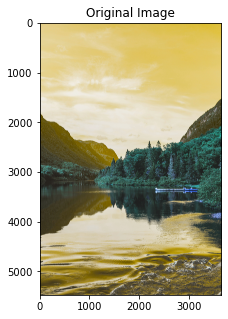

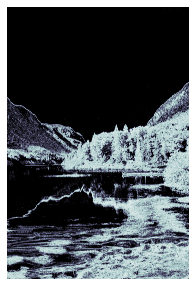

In [16]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
magnitude=[]
def update_value(event):
    # This function is triggered whenever the slider value changes
    
    
    value = int(slider.get())
    threshold_label.config(text="Threshold: {}".format(value))  # Update the threshold label
    edges= magnitude > value
    
    
    # Update the plot
    ax.clear()
    ax.imshow(edges, cmap='bone')
    ax.axis('off')
    canvas.draw()

# Image path
image_path = "dataset/alice-triquet-HeEJU3nrg_0-unsplash.jpg"

# Create a Tkinter window
root = tk.Tk()
root.title("Use the slider to change the threshold value")
magnitude = roberts_cross_ours(image_path)

# show the image

plt.figure(figsize=(5,5))
plt.title("Original Image")
plt.imshow(cv2.imread(image_path))

threshold_label = tk.Label(root, text="Threshold: 0")
threshold_label.pack(pady=10)

# Create a slider widget
slider = ttk.Scale(root, from_=0, to=20, orient="horizontal", command=update_value)
slider.pack(padx=20, pady=20)

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('off')


# Embed the matplotlib figure into Tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# Run the Tkinter event loop
root.mainloop()

Now we will look at how to do this directly using a library function roberts from skimage filters.
It has 2 parameters image and mask.
1. image: The input image.
2. mask: used to specify the region of interest. But since we are using the entire image, we are not using it.

In [17]:
from skimage.filters import roberts
def Roberts_edges(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image=cv2.GaussianBlur(image,(3,3),0)
    # Apply Roberts Cross edge detection
    
    edges = roberts(image)     
    return edges

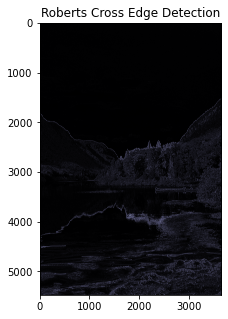

In [18]:
image_path = "dataset/alice-triquet-HeEJU3nrg_0-unsplash.jpg"

edges= Roberts_edges(image_path)  

plt.figure(figsize=(5,5))
plt.title("Roberts Cross Edge Detection")
plt.imshow(edges, cmap='bone')


#### Prewitt Edge detection

This edge detection technique was introduced by Judith Prewitt in 1970.

The prewitt operator is similar to the Roberts operator. It uses 2 $3 \times 3$ masks to calculate the gradient of the image. The masks are as follows:

$$ A = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} $$
$$ B = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix} $$


Using this we can calculate the gradient of the image as follows:

$$ G_x = A * I $$
$$ G_y = B * I $$

$$ G = \sqrt{G_x^2 + G_y^2} $$

Here's how we can do this using library functions.

We are using the prewitt filter from skimage library. It has 5 parameters
1. image: The image on which we want to apply the filter
2. mask: to specify the region of interest
3. axis: The axis along which we want to apply the filter.
4. mode: To specify how edges are handled.
5. cval: to specify the value to be used for padding

the parameters 2-5 are optional.


In [19]:
from skimage.filters import prewitt
def Prewitt_edges(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.GaussianBlur(image,(3,3),0)
    
    # Apply Prewitt edge detection
    edges = prewitt(image)
    return edges

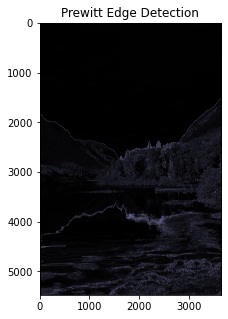

In [20]:
image_path = "dataset/alice-triquet-HeEJU3nrg_0-unsplash.jpg"

edges= Prewitt_edges(image_path)  

plt.figure(figsize=(5,5))
plt.title("Prewitt Edge Detection")
plt.imshow(edges, cmap='bone')

#### Sobel Edge detection

Sobel Edge detection was introduced by Irwin Sobel in 1983. It is a popular edge detection technique. It uses 2 $3 \times 3$ masks to calculate the gradient of the image. The mask are as follows:

$$ A = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} $$
$$ B = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $$

Calculating the gradient of the image:

$$ G_x = A * I $$
$$ G_y = B * I $$

$$ G = \sqrt{G_x^2 + G_y^2} $$

For this we will be using the library function CV2.Sobel. It has 4 parameters:
1. src: The input image
2. ddepth: specifies the precision of the output image
3. dx: The order of the derivative in x direction
4. dy: The order of the derivative in y direction
5. ksize: The size of the kernel. It can be 1, 3, 5 or 7. It is 3 by default.

3 and 4 are optional and they can be thought of as multiplier for the x and y masks respectively.


In [21]:
def Sobel_edges(image_path):
    
    image = cv2.imread(image_path, 0)
    # image = cv2.GaussianBlur(image,(3,3),0)
    
     # Apply Sobel edge detection
    edges_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    edges_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute the magnitude of gradients
    magnitude = np.sqrt(edges_x**2 + edges_y**2)
    return magnitude

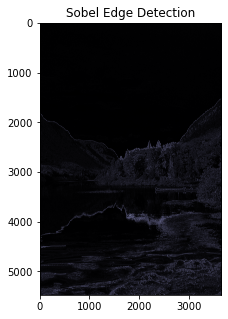

In [22]:
image_path = "dataset/alice-triquet-HeEJU3nrg_0-unsplash.jpg"
edges = Sobel_edges(image_path)

plt.figure(figsize=(5,5))
plt.title("Sobel Edge Detection")
plt.imshow(edges, cmap='bone')

#### Canny Edge detection

This technique was introduced by John F. Canny in 1986. It is one of the most popular edge detection techniques. It is a multi-step algorithm that involves:

1. Noise reduction using a Gaussian filter.
2. Calculating the Intensity Gradient of the Image
3. Suppression of False Edges
4. Hysteresis thresholding.


##### Noise reduction using a Gaussian filter
This step is used to remove noise from the image. We use a Gaussian filter for this purpose.

##### Calculating the Intensity Gradient of the Image
We use the Sobel operator to calculate the gradient of the image.

##### Suppression of False Edges
1. After reducing noise and calculating the intensity gradient, the algorithm in this step uses a technique called non-maximum suppression of edges to filter out unwanted pixels (which may not actually constitute an edge).
2. We compare each of the pixels with their neighbours in the direction of the gradient. If the pixel is greater than both of its neighbours, we keep it. Otherwise, we suppress it.
3. This step is used to thin the edges.

##### Hysteresis thresholding
1. In this step, we use two thresholds: high and low.
2. If the gradient of the pixel is greater than the high threshold, we consider it as an edge pixel.
3. If the gradient of the pixel is less than the low threshold, we discard it.
4. All the middleground edges are considered only if they are connected to high threshold edges.



Now we will look at the implementation of the Canny edge detection algorithm using the library function cv2.Canny. It has 3 parameters:
1. image: The input image
2. threshold1: The lower threshold
3. threshold2: The higher threshold


In [23]:
def Canny_edges(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply Canny edge detection
    edges = cv2.Canny(image, 100, 200)  # these values are default thresholds and are suggested by OpenCV
    return edges


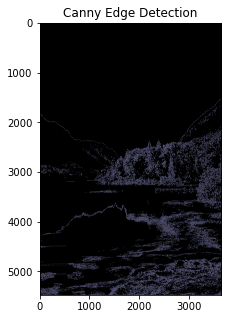

In [24]:
image_path = "dataset/alice-triquet-HeEJU3nrg_0-unsplash.jpg"

edges = Canny_edges(image_path)

plt.figure(figsize=(5,5))
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap='bone')

### Comparing all the edge detection algorithms

Here we use the above techniques on the 9 images and compare the results. We will also compare the time taken by each of the algorithms.

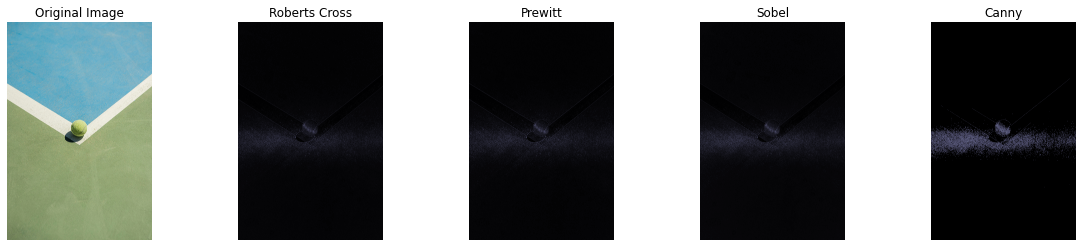

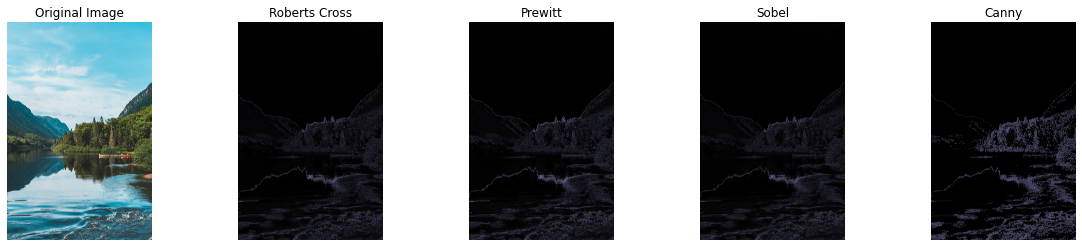

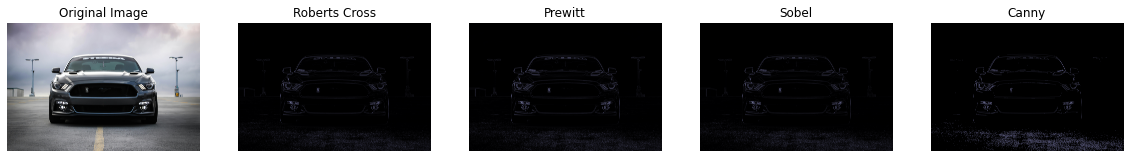

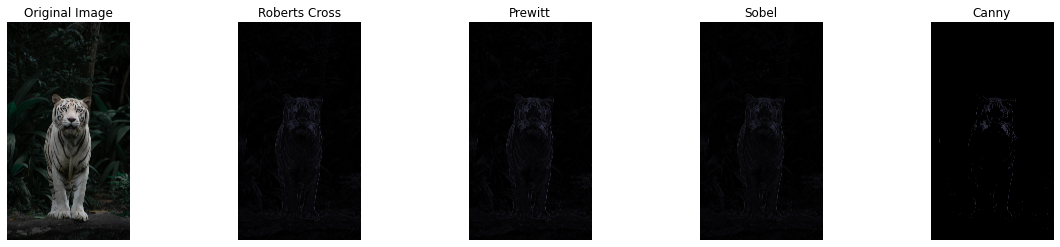

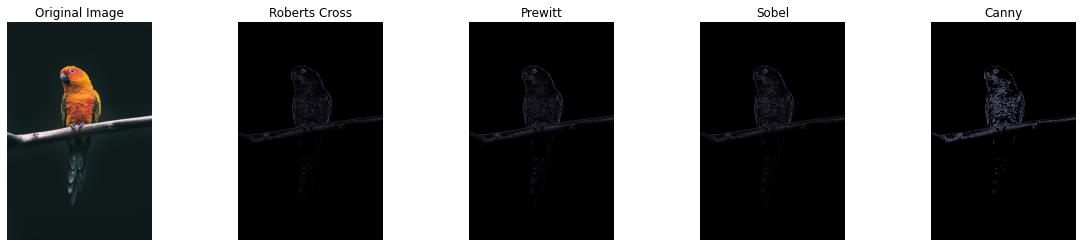

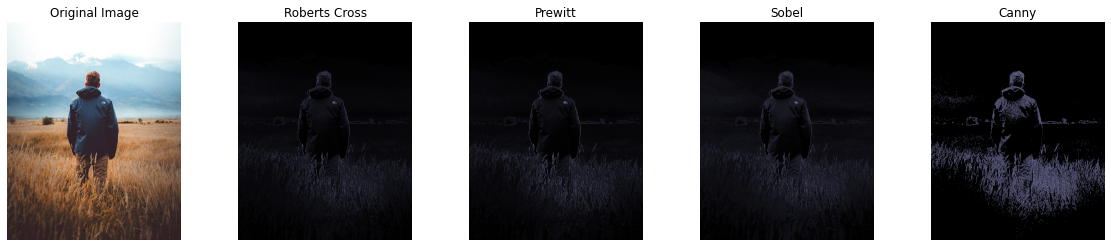

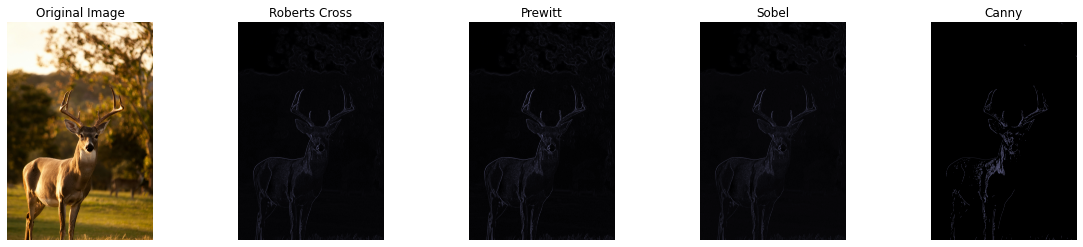

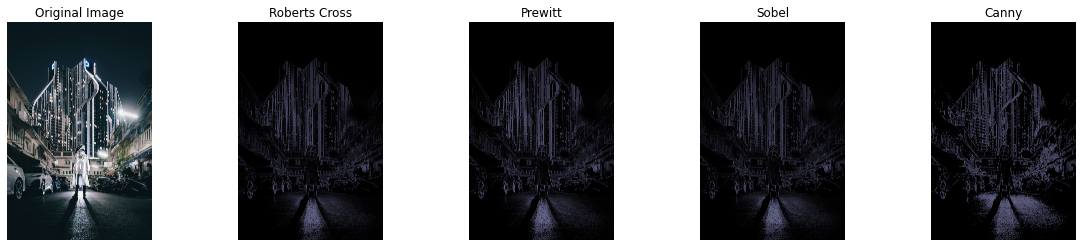

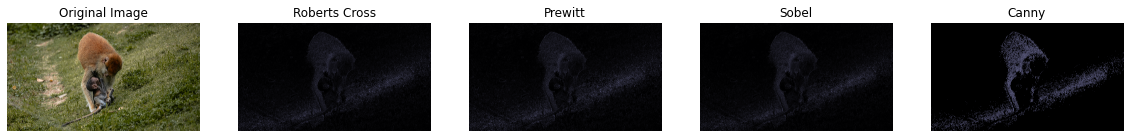

In [26]:
import os

data_folder="dataset"

# Get the list of all image files in the data folder
image_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.jpg')]

for image_file in image_files:
    image = cv2.imread(image_file)
    roberts_edges = Roberts_edges(image_file)
    prewitt_edges = Prewitt_edges(image_file)
    sobel_edges = Sobel_edges(image_file)
    canny_edges = Canny_edges(image_file)
    
    plt.figure(figsize=(20, 4))
    
    # original image
    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Roberts Cross edges
    plt.subplot(1, 5, 2)
    plt.imshow(roberts_edges, cmap='bone')
    plt.title('Roberts Cross')
    plt.axis('off')
    
    # Prewitt edges
    plt.subplot(1, 5, 3)
    plt.imshow(prewitt_edges, cmap='bone')
    plt.title('Prewitt')
    plt.axis('off')
    
    # Sobel edges
    plt.subplot(1, 5, 4)
    plt.imshow(sobel_edges, cmap='bone')
    plt.title('Sobel')
    plt.axis('off')
    
    # Canny edges
    plt.subplot(1, 5, 5)
    plt.imshow(canny_edges, cmap='bone')
    plt.title('Canny')
    plt.axis('off')
    
    plt.show()
    